In [1]:
%matplotlib inline

import re
import json
import glob
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import StratifiedKFold

unify_alleles = lambda x: re.sub('[*|:|-]', '', x)

In [2]:
df = pd.read_csv("../data/abelin_peptides.all_predictions.csv.bz2", sep=",")
df = df[["hit", "allele", "peptide", "mhcflurry_1local", "netmhc", "netmhcpan"]]

tmp2 = df.groupby("allele")

files = glob.glob("/Users/vdn/Downloads/Telegram Desktop/results/*")
df2 = pd.read_csv(files[0], sep=" ")
key = df2["HLA"][0]
print("{} {:<6} {:<6} {:<5}".format(key, len(df2), len(tmp2.groups[key]), len(df2) - len(tmp2.groups[key])))
for f in files[1:]:
    tmp = pd.read_csv(f, sep=" ")
    key = tmp["HLA"][0]
    print("{} {:<6} {:<6} {:<5}".format(key, len(tmp), len(tmp2.groups[key]), len(tmp) - len(tmp2.groups[key])))
    df2 = df2.merge(tmp, how="outer")
print(len(df2))
df2.columns = ["allele", "peptide", "netmhcpan4"]
df2.head()

HLA-A*01:01 126523 126553 -30  
HLA-A*02:01 264828 265024 -196 
HLA-A*02:03 185094 185133 -39  
HLA-A*02:04 165910 165943 -33  
HLA-A*02:07 335214 335320 -106 
HLA-A*03:01 168012 168064 -52  
HLA-A*24:02 223152 223210 -58  
HLA-A*29:02 88259  88274  -15  
HLA-A*31:01 124143 124230 -87  
HLA-A*68:02 200434 200687 -253 
HLA-B*35:01 90419  90496  -77  
HLA-B*44:02 108356 108373 -17  
HLA-B*44:03 92201  92213  -12  
HLA-B*51:01 143165 143218 -53  
HLA-B*54:01 122383 122412 -29  
HLA-B*57:01 127547 127664 -117 
2565640


,allele,peptide,netmhcpan4
0,HLA-A*01:01,LHYVEGSYR,36078.9
1,HLA-A*01:01,SKFLETPLLS,34632.0
2,HLA-A*01:01,LERALQQKNQEIEEL,42029.7
3,HLA-A*01:01,QQDYFHSILGP,36408.7
4,HLA-A*01:01,FSKLMSVCVM,10937.9


In [53]:
#
# Get all lost peptides
#

# df = pd.read_csv("../data/abelin_peptides.all_predictions.csv.bz2", sep=",")
# df = df[["hit", "allele", "peptide", "mhcflurry_1local", "netmhc", "netmhcpan"]]

# tmp2 = df.groupby("allele")

# files = glob.glob("/Users/vdn/Downloads/Telegram Desktop/results/*")
# df2 = pd.read_csv(files[0], sep=" ")
# key = df2["HLA"][0]
# print("{} {:<6} {:<6} {:<5}".format(key, len(df2), len(tmp2.groups[key]), len(df2) - len(tmp2.groups[key])))
# for f in files[1:]:
#     tmp = pd.read_csv(f, sep=" ")
#     key = tmp["HLA"][0]
#     print("{} {:<6} {:<6} {:<5}".format(key, len(tmp), len(tmp2.groups[key]), len(tmp) - len(tmp2.groups[key])))
#     df2 = df2.merge(tmp, how="outer")
# print(len(df2))
# df2.columns = ["allele", "peptide", "netmhcpan4"]

# df_tmp = df.merge(df2, how="left", on=["allele", "peptide"], indicator=True)
# df_tmp.loc[df_tmp["_merge"] == "left_only", :].to_csv("../missed_peptides.csv")

In [3]:
df1_new = df.sort_values(by="hit", ascending=False).drop_duplicates(subset=["allele", "peptide"])
df3 = df1_new.merge(df2, how="outer", left_on=["allele", "peptide"], right_on=["allele", "peptide"])
df3["netmhcpan4"].values[np.isnan(df3["netmhcpan4"].values)] = 50000

# Load Abelin scores into the memory

In [4]:
# df = pd.read_csv("../data/abelin_peptides.all_predictions.csv.bz2", sep=",")
# df = df[["hit", "allele", "peptide", "mhcflurry_1local", "netmhc", "netmhcpan"]]

unify_alleles = lambda x: re.sub('[*|:|-]', '', x)
df3["allele"] = df3["allele"].map(unify_alleles)

length_vec = df3["peptide"].map(len).values
length_list = np.unique(length_vec)
column_list = ["mhcflurry_1local", "netmhc", "netmhcpan", "netmhcpan4"]
allele_list = np.unique(df3["allele"])

In [41]:
# from scipy.stats import gmean
# import warnings

# min_len = 8
# max_len = 11

# score_d[str((min_len, max_len))] = {}
# # df4 = df3.loc[(length_vec >= min_len) & (length_vec <= max_len), :]
# score_list = []

# print("{:<8} {:<7} {:<7} {:>7} {:>7}".format(*[str((min_len, max_len)), "mean", "median", "gmean", "netmhcpan4"]))
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     for allele in allele_list:
#         scores = []
#         if allele != "HLAA0204":
#             tmp = df4.loc[(df4["allele"] == allele), :]
#             tmp["mean"] = tmp[column_list].apply(np.mean, axis=1)
#             tmp["median"] = tmp[column_list].apply(np.median, axis=1)
#             tmp["gmean"] = tmp[column_list].apply(np.median, axis=1)
#             scores.append(process(tmp, "mean"))
#             scores.append(process(tmp, "median"))
#             scores.append(process(tmp, "gmean"))
#             scores.append(process(tmp, "netmhcpan4"))
#             score_list.append(scores)
#             print("{:<8} {:>7.4} {:>7.4} {:>7.4} {:>7.4}".format(allele, *scores))

(8, 11)  mean    median    gmean netmhcpan4
HLAA0101  0.8738  0.8583  0.8583  0.8645
HLAA0201  0.7171   0.711   0.711  0.7302
HLAA0203  0.7553  0.7396  0.7396  0.7228
HLAA0207  0.6478   0.635   0.635  0.6381
HLAA0301  0.6735  0.6632  0.6632  0.6756
HLAA2402  0.8065  0.7919  0.7919  0.7943
HLAA2902  0.7836   0.781   0.781  0.7913
HLAA3101  0.5699  0.5678  0.5678  0.5773
HLAA6802  0.6238  0.6186  0.6186  0.6225
HLAB3501  0.7434  0.7276  0.7276  0.7487
HLAB4402  0.8229  0.8103  0.8103  0.8365
HLAB4403  0.8325  0.8225  0.8225  0.8325
HLAB5101  0.7352  0.7284  0.7284  0.7958
HLAB5401  0.7179  0.7067  0.7067  0.7104
HLAB5701  0.7362  0.7258  0.7258   0.723



In [45]:
def process(allele_df, column):
    n_of_binders = np.where(allele_df["hit"] == 1)[0].shape[0]
    pred_df = allele_df.reset_index()
    pred_df = pred_df.loc[pred_df[column].argsort(), ]
    return pred_df["hit"].values[:n_of_binders].sum() / n_of_binders

score_d = {}
min_len, max_len = 8, 11
score_d[str((min_len, max_len))] = {}
print("{:<8} {:<7} {:<7} {:>7} {:>7}".format(*[str((min_len, max_len)), "mhcflurry", "netmhc", "netmhcpan", "netmhcpan4"]))
for allele in allele_list:
    scores = []
    if allele != "HLAA0204":
        for col in column_list:
            tmp = df3.loc[(df3["allele"] == allele) & (length_vec >= min_len) & (length_vec <= max_len), ]
            scores.append(process(tmp, col))
    else:
        scores = [-.0, -.0]
        tmp = df3.loc[(df3["allele"] == allele) & (length_vec >= min_len) & (length_vec <= max_len), ]
        scores.append(process(tmp, "netmhcpan"))
        scores.append(process(tmp, "netmhcpan4"))
    print("{:<8} {:>7.4} {:>7.4} {:>7.4} {:>7.4}".format(allele, *scores))
    score_d[str((min_len, max_len))][allele] = scores
abelin_scores = score_d[str((min_len, max_len))]
print()

(8, 11)  mhcflurry netmhc  netmhcpan netmhcpan4
HLAA0101  0.8511   0.817   0.848  0.8645
HLAA0201  0.7049  0.6903  0.7098  0.7302
HLAA0203  0.7531   0.734  0.7239  0.7228
HLAA0204    -0.0    -0.0  0.7022  0.7196
HLAA0207  0.3887  0.4709  0.5778  0.6381
HLAA0301  0.6502  0.6283   0.655  0.6756
HLAA2402  0.7966   0.754  0.7737  0.7943
HLAA2902   0.767  0.7478  0.7682  0.7913
HLAA3101   0.554  0.5434  0.5583  0.5773
HLAA6802  0.6109  0.6005  0.6109  0.6225
HLAB3501  0.7105  0.6934  0.7289  0.7487
HLAB4402  0.7914  0.7579  0.8029  0.8365
HLAB4403  0.8137  0.7612  0.7937  0.8325
HLAB5101  0.7254  0.6846  0.6823  0.7958
HLAB5401  0.6974  0.6741  0.6778  0.7104
HLAB5701  0.7334   0.686  0.7097   0.723



```
(8, 8)   mhcflurry netmhc  netmhcpan netmhcpan4
HLAA0101     0.7  0.5333  0.6333  0.6333
HLAA0201 0.09091  0.1364  0.1818  0.1818
HLAA0203  0.2941  0.2059  0.2059  0.2059
HLAA0204    -0.0    -0.0  0.1739  0.2174
HLAA0207  0.1163  0.1628  0.1395  0.2093
HLAA0301 0.06667  0.1333 0.06667  0.1333
HLAA2402  0.2083    0.25  0.2083    0.25
HLAA2902  0.2857  0.2857  0.2857  0.2857
HLAA3101 0.08824  0.1176  0.1176  0.1176
HLAA6802     0.0     0.0     0.0     0.0
HLAB3501   0.303  0.3333   0.303  0.2727
HLAB4402  0.2857  0.1429  0.1429  0.2857
HLAB4403     0.5     0.0     0.0     0.0
HLAB5101  0.7273  0.6696  0.6785  0.8071
HLAB5401  0.6218  0.6134  0.5966  0.6303
HLAB5701  0.3455  0.3455  0.3273  0.3455

(9, 9)   mhcflurry netmhc  netmhcpan netmhcpan4
HLAA0101  0.8804  0.8971  0.8947  0.8947
HLAA0201  0.7885   0.808  0.8135  0.8208
HLAA0203  0.8099  0.8107  0.8016  0.7992
HLAA0204    -0.0    -0.0  0.7944  0.8029
HLAA0207  0.5286  0.6537  0.7092  0.7529
HLAA0301  0.7322  0.7348   0.752  0.7507
HLAA2402  0.8513  0.8435  0.8528  0.8721
HLAA2902  0.8481  0.8407  0.8481  0.8685
HLAA3101  0.7241  0.7358  0.7335  0.7453
HLAA6802  0.7291    0.75  0.7467  0.7511
HLAB3501  0.8165  0.8021  0.8289  0.8289
HLAB4402  0.7888  0.7864  0.8471  0.8568
HLAB4403  0.8474  0.8392  0.8556  0.8719
HLAB5101  0.7828  0.7547  0.7748  0.8606
HLAB5401  0.7727   0.776   0.789  0.8003
HLAB5701  0.7887  0.7866  0.7866  0.7845

(10, 10) mhcflurry netmhc  netmhcpan netmhcpan4
HLAA0101  0.8604  0.8409  0.8604  0.8766
HLAA0201  0.6041  0.5656  0.5964  0.5938
HLAA0203  0.6726  0.6009  0.6076  0.6166
HLAA0204    -0.0    -0.0  0.4966  0.5172
HLAA0207  0.2406  0.2948  0.2925  0.3726
HLAA0301  0.6378  0.6142  0.6142  0.6273
HLAA2402  0.7574  0.6782   0.698  0.7203
HLAA2902  0.6556  0.6026  0.6556  0.6556
HLAA3101   0.456  0.4249  0.4404  0.4301
HLAA6802  0.5238  0.4846  0.4874  0.4874
HLAB3501   0.597  0.5522  0.6045  0.6194
HLAB4402   0.845  0.8207  0.8511  0.8693
HLAB4403  0.8175  0.7883  0.8066  0.8431
HLAB5101  0.5467  0.5067  0.5333  0.5733
HLAB5401  0.6237  0.6082  0.6082  0.6186
HLAB5701  0.7888  0.7426  0.7525  0.7393

(11, 11) mhcflurry netmhc  netmhcpan netmhcpan4
HLAA0101  0.8294  0.6493  0.7773  0.8152
HLAA0201  0.4988  0.3704  0.4469  0.5259
HLAA0203  0.4023  0.2299  0.2874  0.3103
HLAA0204    -0.0    -0.0  0.3497  0.4056
HLAA0207  0.2513  0.1979   0.238  0.3182
HLAA0301  0.6808  0.5928  0.6156   0.671
HLAA2402  0.7296  0.6026  0.6384  0.7003
HLAA2902  0.5181  0.3976   0.506  0.5663
HLAA3101  0.5324  0.3891   0.471  0.4949
HLAA6802  0.3099  0.2645   0.314  0.3347
HLAB3501  0.5463  0.4907  0.5278  0.5463
HLAB4402  0.7767  0.6748  0.7427  0.7961
HLAB4403  0.7582  0.6144  0.7386  0.8105
HLAB5101    0.42    0.34    0.38    0.46
HLAB5401  0.6069  0.4966  0.5655  0.5793
HLAB5701  0.6743  0.5229  0.6239  0.6422
```

In [76]:
def plot_scores(filenames, abeline_line=False, col_ind=3):
    fig, ax = plt.subplots(1, 3)
    fig.set_figheight(6)
    fig.set_figwidth(22)

    scores = {}
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    diffs = []
    allele_list = []
    for i, filename in enumerate(filenames):
        key = filename[filename.find("/")+1:]
        with open(filename) as inf:
            json_val = json.load(inf)
        iters = len(json_val["scores"]["train"]["auc"])
        poses = np.arange(1, iters+1, 1)
        ax[0].plot(poses, json_val["scores"]["train"]["auc"], label=key, c=colors[i])
        ax[0].plot(poses, json_val["scores"]["val"]["auc"], c=colors[i], linestyle="--")
        ax[1].plot(poses, json_val["scores"]["train"]["f1"], label=key, c=colors[i])
        ax[1].plot(poses, json_val["scores"]["val"]["f1"], linestyle="--", c=colors[i])
        if abeline_line:
            ax[2].scatter([abelin_scores[allele][col_ind] for allele in json_val["scores"]["abelin"]["all"]],
                          [json_val["scores"]["abelin"]["all"][allele] for allele in json_val["scores"]["abelin"]["all"]],
                          label=key, c=colors[i])
        else:
            allele_list = sorted(abelin_scores.keys())
            diff_scores = [((json_val["scores"]["abelin"]["all"][allele] / abelin_scores[allele][0]) - 1) * 100 for allele in sorted(abelin_scores.keys())]
            diff_scores = np.array(diff_scores)
            diffs.append(diff_scores)
        
    if not abeline_line:
        merged = np.vstack(diffs)
        merged = (merged - merged.min(axis=0)) / (merged.max(axis=0) - merged.min(axis=0) + 0.001)
        for i, filename in enumerate(filenames):
            key = filename[filename.find("/")+1:]

            ax[2].scatter(merged[i], sorted(abelin_scores.keys()), label=key, c=colors[i], s=30)
            ax[2].plot(merged[i], sorted(abelin_scores.keys()), label=key, c=colors[i], linestyle=":")
    else:
        ax[2].plot((0.45,.8), (0.45,.8), c="black", linestyle="--")

    ax[0].set_title("auc")

    ax[1].set_title("f1")

    ax[2].set_xlabel("netmhcpan abelin")
    ax[2].set_ylabel("simurgh abelin")
    ax[1].legend()

# 1. Training on the human-only data shows a little bit better results

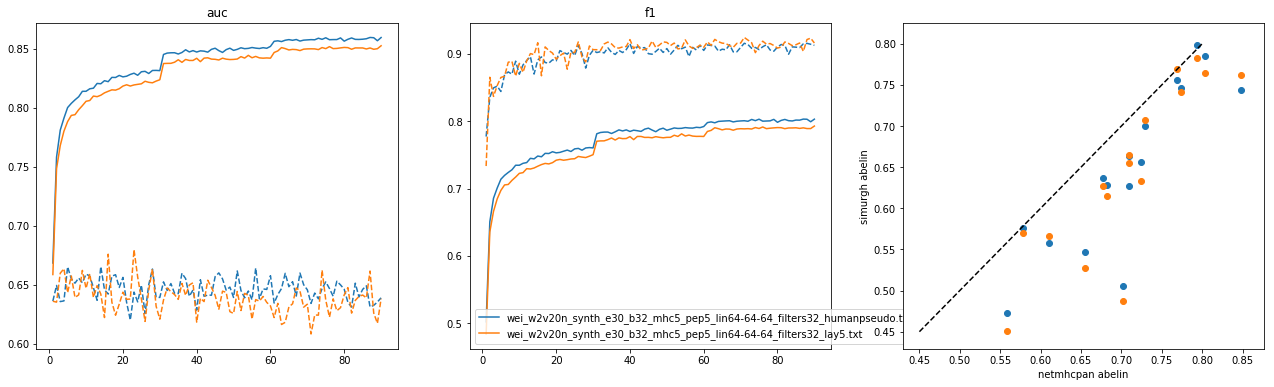

In [75]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin64-64-64_filters32_humanpseudo.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin64-64-64_filters32_lay5.txt"
    ]

plot_scores(f, True)

# 2. Greater number of samples in "wei" Sampler increases scores and stability

## Greater number means more training iterations

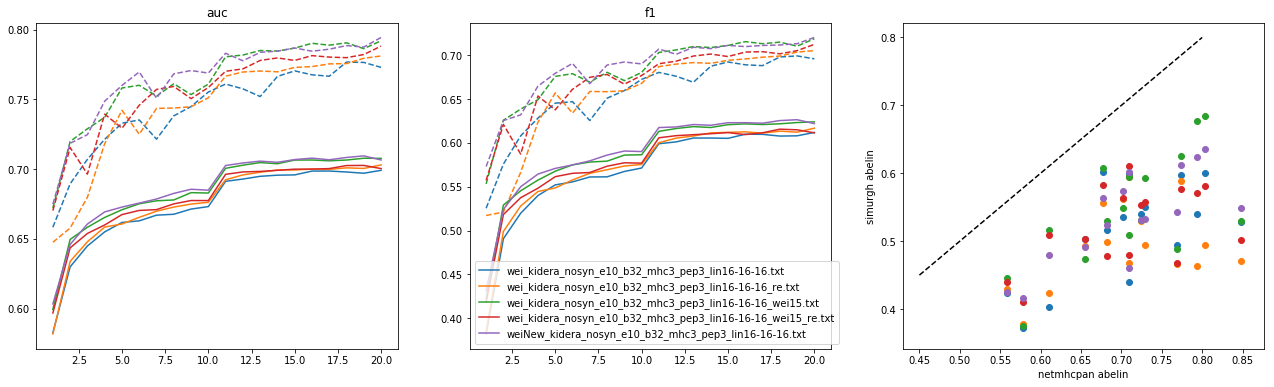

In [21]:
f = ["results2/wei_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt", 
     "results2/wei_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16_re.txt",
     "results2/wei_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16_wei15.txt",
     "results2/wei_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16_wei15_re.txt", #alpha = 1.5
     "results2/weiNew_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt" # fixed wei: weights / sum(weights) in order to make them probs
    ]

plot_scores(f, True)

# 3. Number of dense layers influences the result

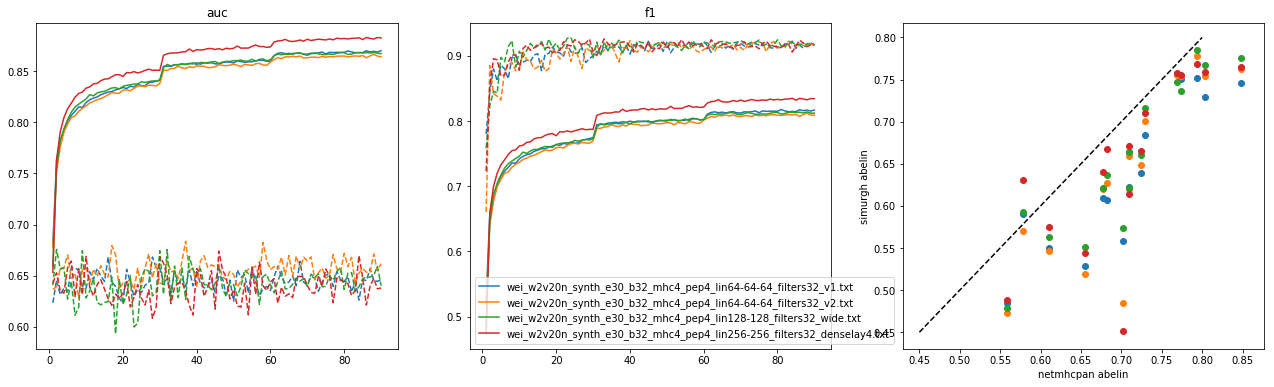

In [23]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v1.txt", 
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v2.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin128-128_filters32_wide.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin256-256_filters32_denselay4.txt"
    ]

plot_scores(f, True)

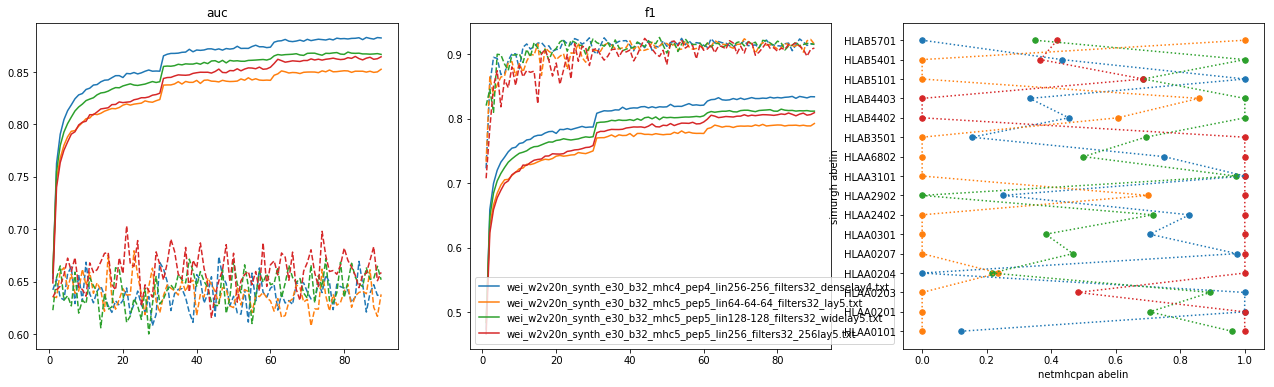

In [26]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin256-256_filters32_denselay4.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin64-64-64_filters32_lay5.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin128-128_filters32_widelay5.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin256_filters32_256lay5.txt"
    ]

plot_scores(f, False)

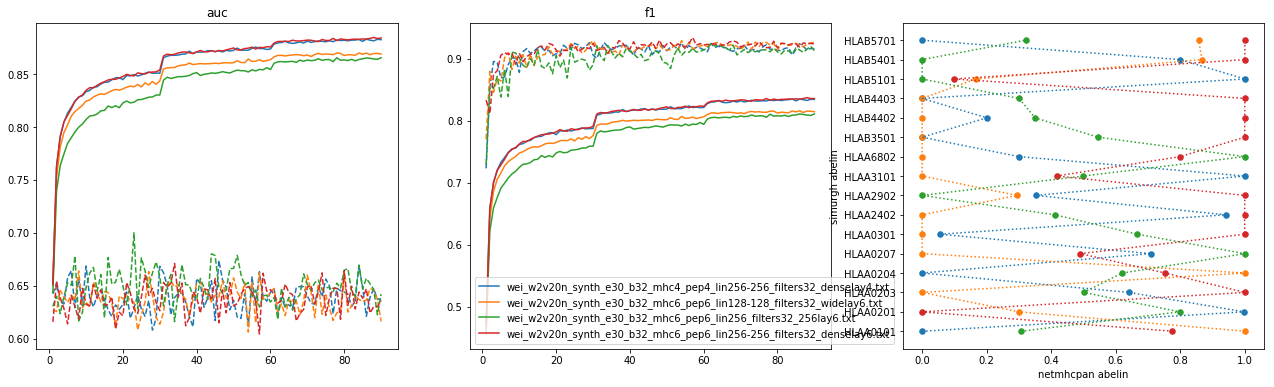

In [29]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin256-256_filters32_denselay4.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin128-128_filters32_widelay6.txt", 
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256_filters32_256lay6.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256-256_filters32_denselay6.txt"
    ]

plot_scores(f, False)

# 5. "Bal" is very unstable, "wei" is more stable and generally better at Abelin

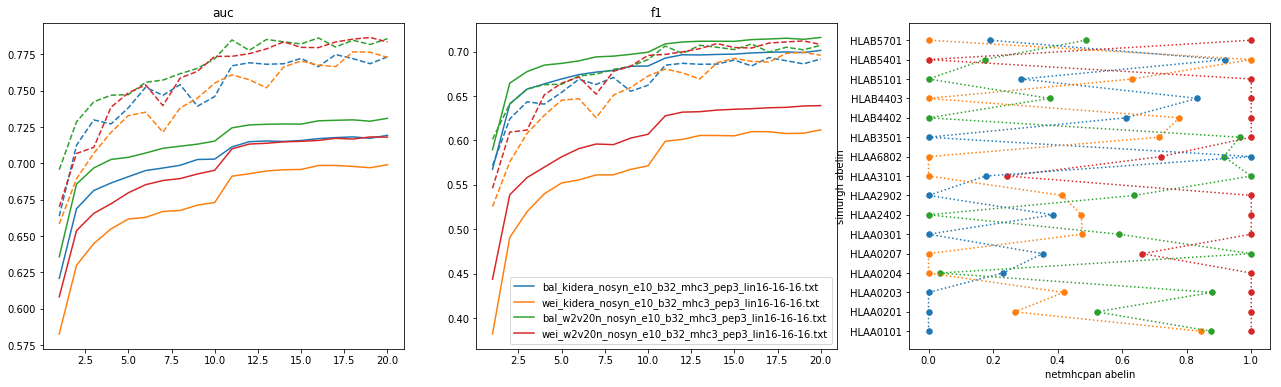

In [210]:
f = ["results/bal_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt", 
     "results/wei_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt", 
     "results/bal_w2v20n_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt", 
     "results/wei_w2v20n_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt"]

plot_scores(f)

# 6. Dropouts need to be dealt with very carefully

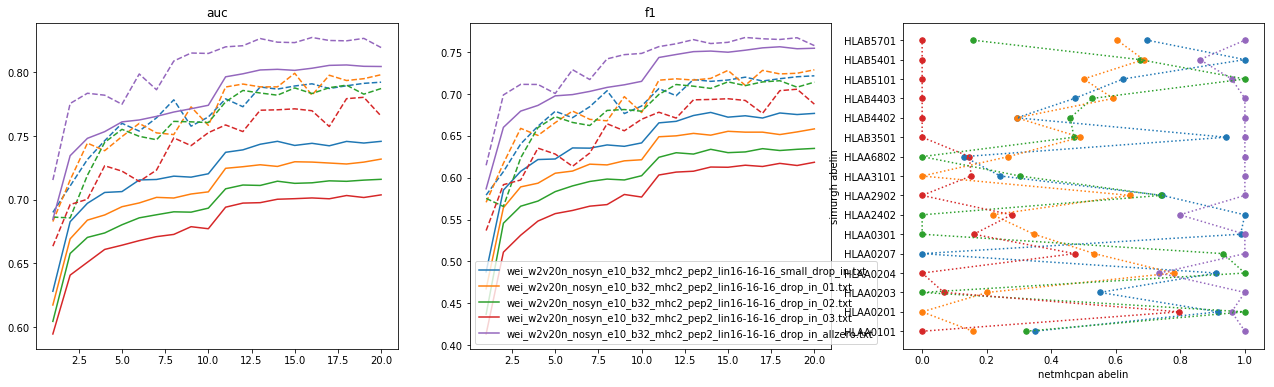

In [211]:
f = ["results/wei_w2v20n_nosyn_e10_b32_mhc2_pep2_lin16-16-16_small_drop_in.txt", 
     "results/wei_w2v20n_nosyn_e10_b32_mhc2_pep2_lin16-16-16_drop_in_01.txt",
     "results/wei_w2v20n_nosyn_e10_b32_mhc2_pep2_lin16-16-16_drop_in_02.txt",
     "results/wei_w2v20n_nosyn_e10_b32_mhc2_pep2_lin16-16-16_drop_in_03.txt", #input dropout = 0.3
     "results/wei_w2v20n_nosyn_e10_b32_mhc2_pep2_lin16-16-16_drop_in_allzero.txt" # all dropouts are zeros (dense, conv, input)
    ] 

plot_scores(f)

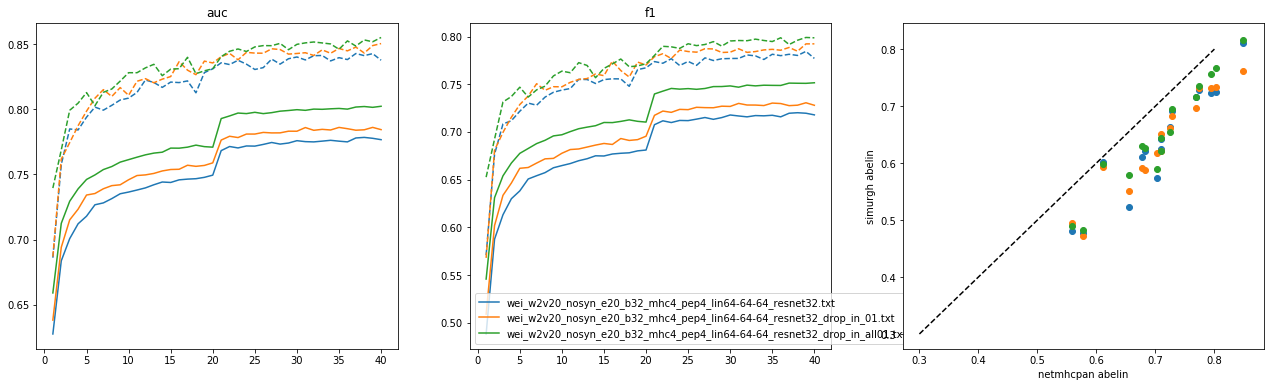

In [212]:
f = ["results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64_resnet32.txt",
     "results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_01.txt",
     "results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_all01.txt" # all dropouts are 0.1
    ]

plot_scores(f, True)

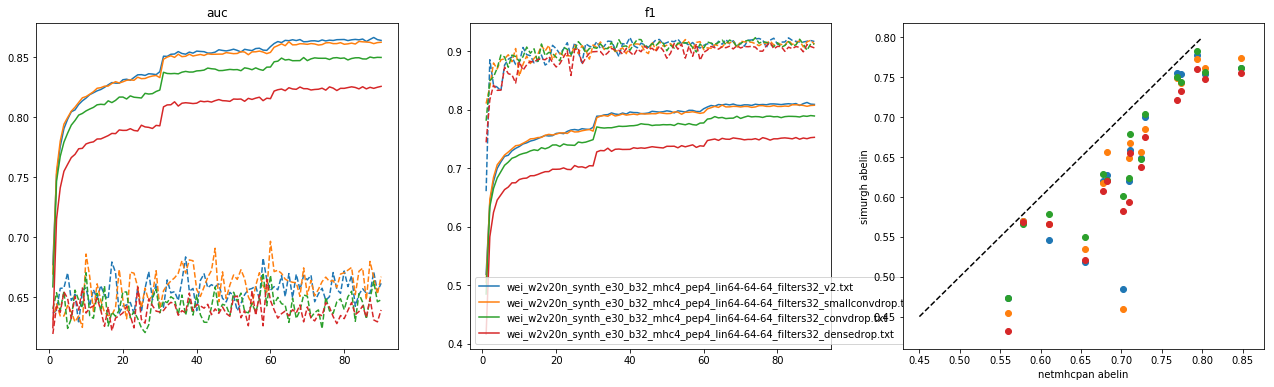

In [153]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v2.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_smallconvdrop.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_convdrop.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_densedrop.txt"
    ]

plot_scores(f, True)

# 7. Number of filters affects the result

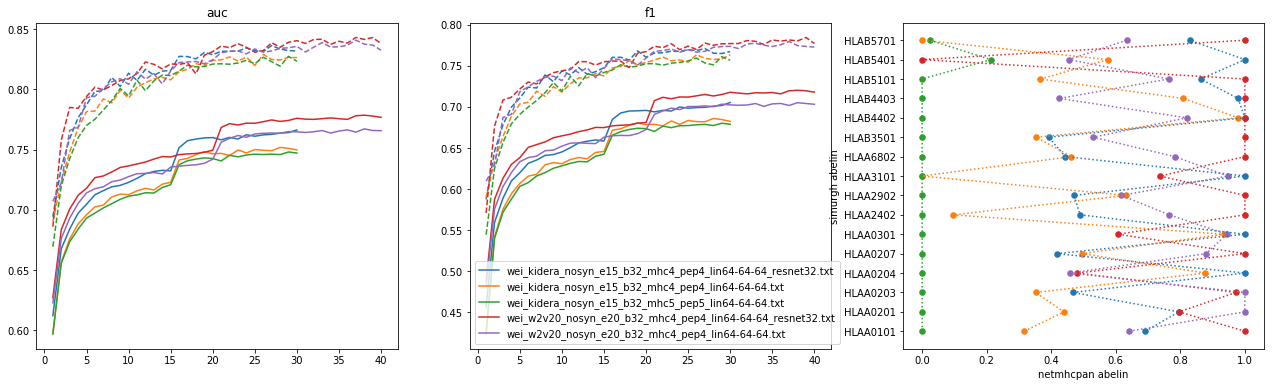

In [237]:
# resnet32 - 32 filters per block
# no resnet32 - 16 filters per block
f = ["results/wei_kidera_nosyn_e15_b32_mhc4_pep4_lin64-64-64_resnet32.txt", 
     "results/wei_kidera_nosyn_e15_b32_mhc4_pep4_lin64-64-64.txt",
     "results/wei_kidera_nosyn_e15_b32_mhc5_pep5_lin64-64-64.txt",
     "results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64_resnet32.txt",
     "results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64.txt"
    ]

plot_scores(f)

# Number of blocks

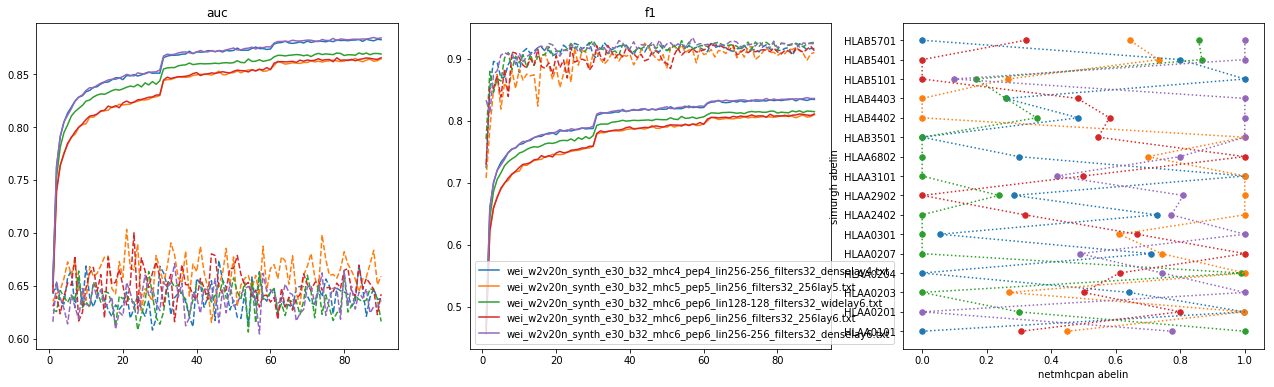

In [37]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin256-256_filters32_denselay4.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin256_filters32_256lay5.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin128-128_filters32_widelay6.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256_filters32_256lay6.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256-256_filters32_denselay6.txt"
    ]

plot_scores(f, False)

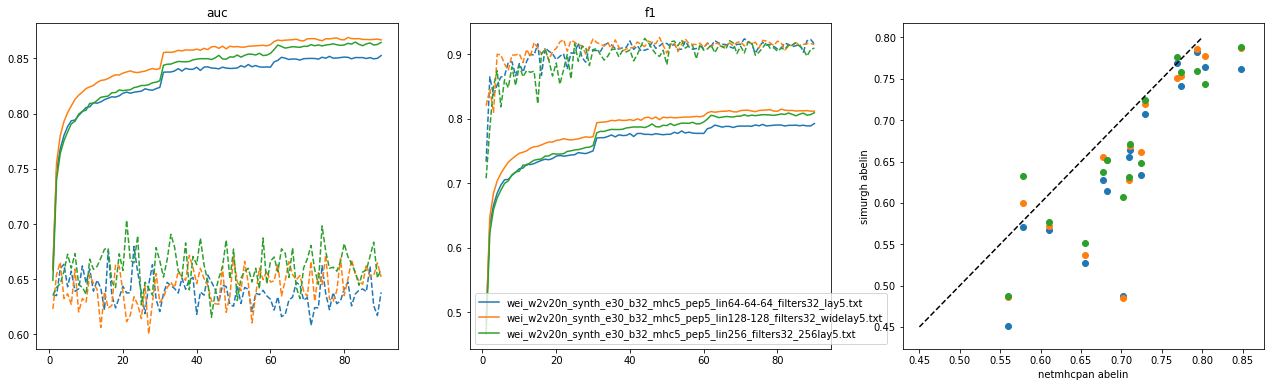

In [26]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin64-64-64_filters32_lay5.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin128-128_filters32_widelay5.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc5_pep5_lin256_filters32_256lay5.txt"
    ]

plot_scores(f, True)

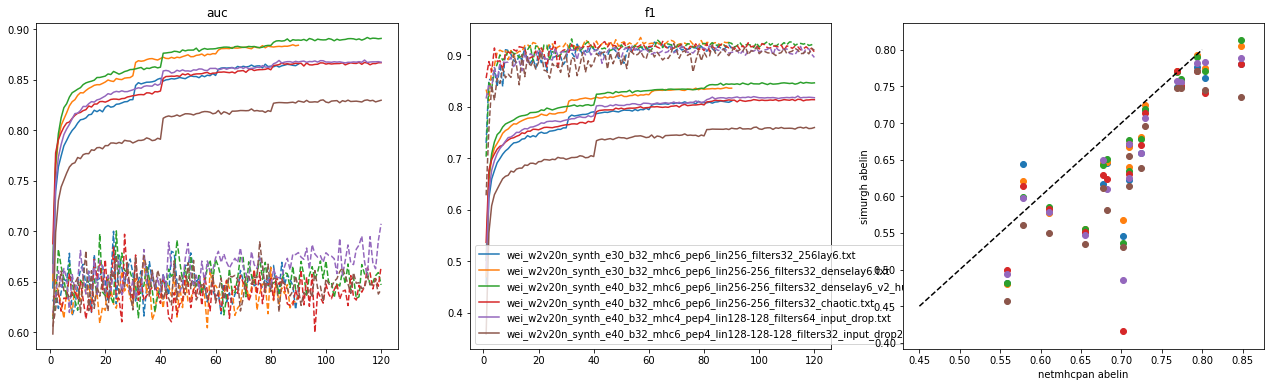

In [38]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256_filters32_256lay6.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256-256_filters32_denselay6.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc6_pep6_lin256-256_filters32_denselay6_v2_human.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc6_pep6_lin256-256_filters32_chaotic.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc4_pep4_lin128-128_filters64_input_drop.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc6_pep4_lin128-128-128_filters32_input_drop2.txt"
    ]

plot_scores(f, True)

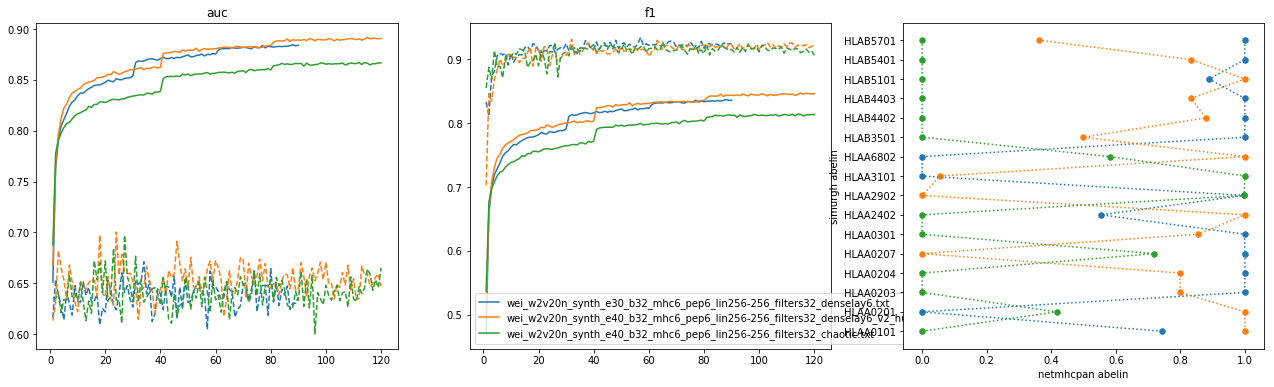

In [13]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256-256_filters32_denselay6.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc6_pep6_lin256-256_filters32_denselay6_v2_human.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc6_pep6_lin256-256_filters32_chaotic.txt", #human
    ]

plot_scores(f, False)

# 8. Word2vec vectors are better than Kidera vectors (and one-hot - trust me)
## L2-normalized word vectors on par with non-normalized

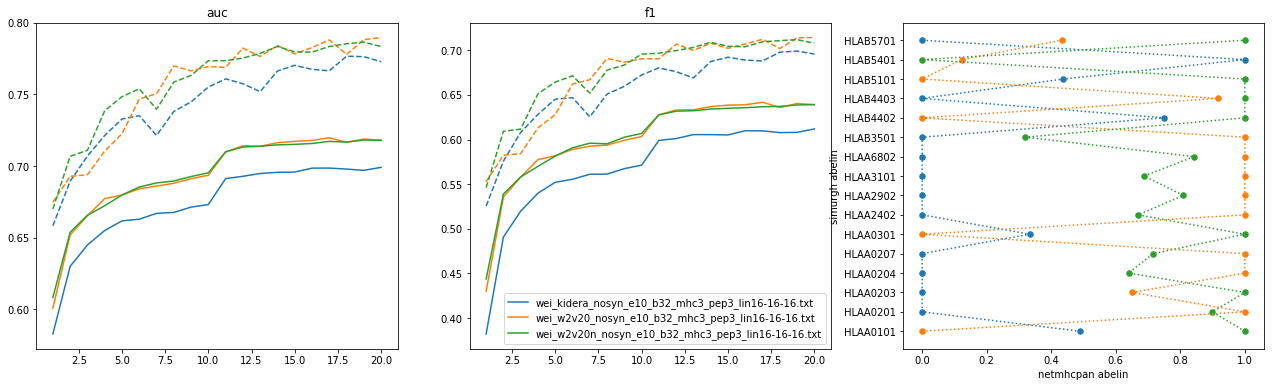

In [214]:
f = ["results/wei_kidera_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt",
     "results/wei_w2v20_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt",
     "results/wei_w2v20n_nosyn_e10_b32_mhc3_pep3_lin16-16-16.txt"]

plot_scores(f)

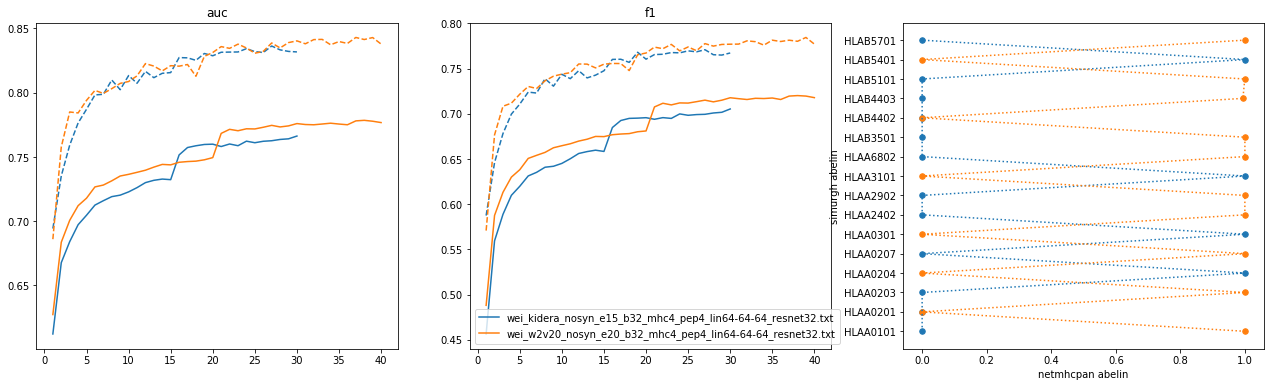

In [215]:
f = ["results/wei_kidera_nosyn_e15_b32_mhc4_pep4_lin64-64-64_resnet32.txt", 
     "results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64_resnet32.txt"]

plot_scores(f)

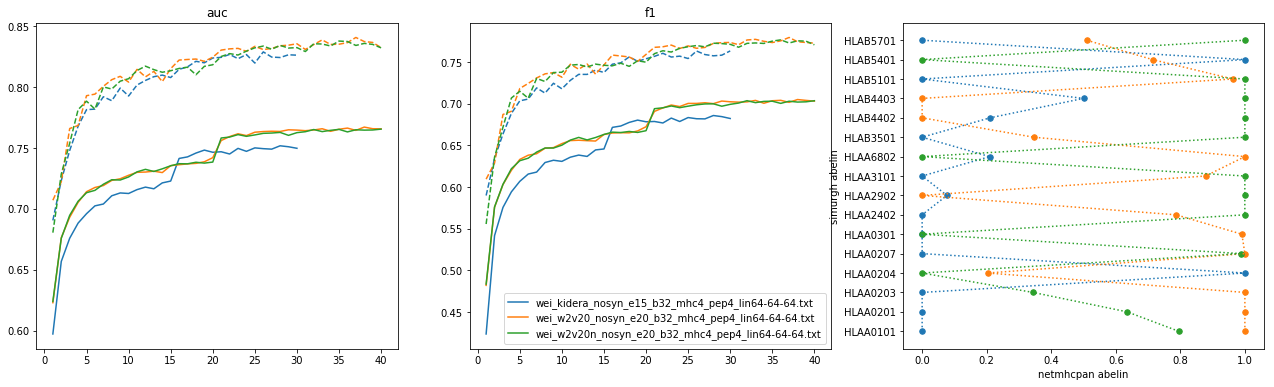

In [216]:
f = ["results/wei_kidera_nosyn_e15_b32_mhc4_pep4_lin64-64-64.txt",
     "results/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64.txt",
     "results/wei_w2v20n_nosyn_e20_b32_mhc4_pep4_lin64-64-64.txt"
    ]

plot_scores(f)

# 9. He normal vs He uniform (uniform is better)

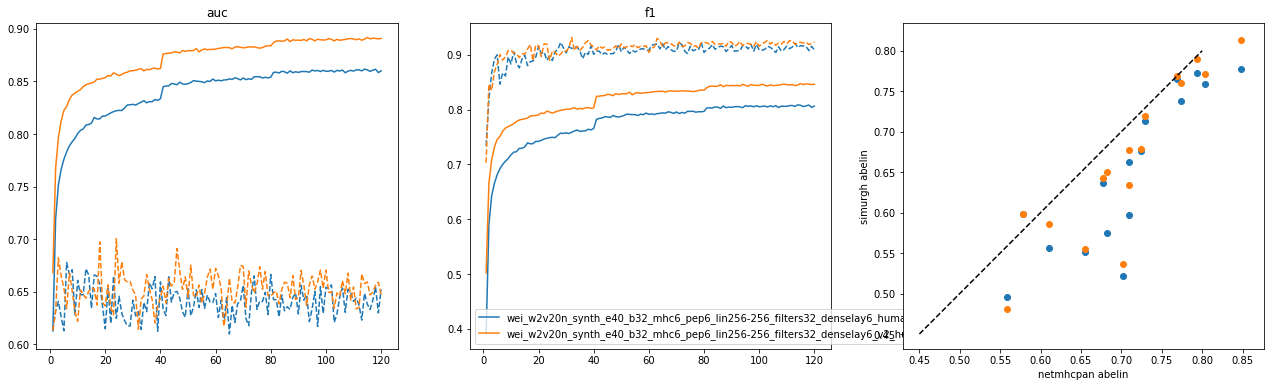

In [44]:
f = ["results/wei_w2v20n_synth_e40_b32_mhc6_pep6_lin256-256_filters32_denselay6_human_henormal.txt",
     "results/wei_w2v20n_synth_e40_b32_mhc6_pep6_lin256-256_filters32_denselay6_v2_human.txt"
    ]

plot_scores(f, True)

# 11. Training the best model in 3 phases: batch_size, 4xbatch_size, 16xbatch_size, alpha=1.5 in wei

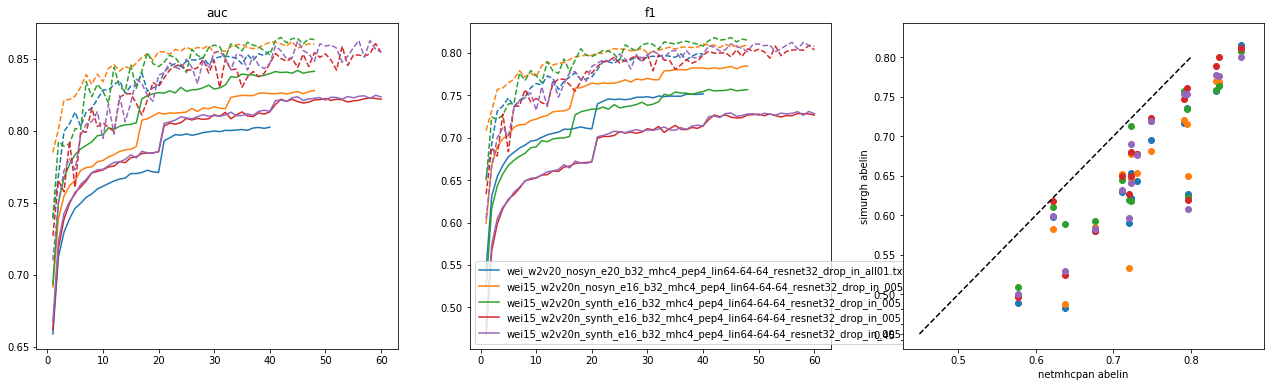

In [79]:
f = ["results2/wei_w2v20_nosyn_e20_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_all01.txt", # old best model, all dropouts are 0.1
     "results2/wei15_w2v20n_nosyn_e16_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_005_3phases.txt", # all dropouts are 0.05
     "results2/wei15_w2v20n_synth_e16_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_005_3phases.txt", # previous model, with synthetic data
     "results2/wei15_w2v20n_synth_e16_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_005_3phases.txt_dropouts.txt", # previous model, with synth data, input dropout is 0.05, conv dropouts are 0.1, dense dropouts are 0.2
     "results2/wei15_w2v20n_synth_e16_b32_mhc4_pep4_lin64-64-64_resnet32_drop_in_005_3phases.txt_dropouts_re.txt"
    ]

plot_scores(f, True)

In [ ]:
# global batch norm
# local batch norm
# final sigmoid on <best> batch norm

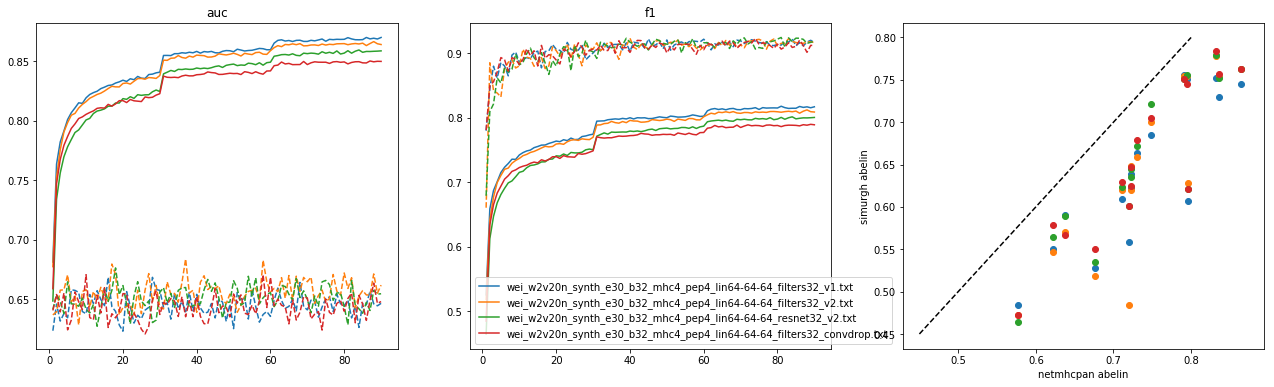

In [78]:
f = ["results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v1.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v2.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_resnet32_v2.txt",
     "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_convdrop.txt"
    ]

plot_scores(f, True)

# Input embeddings

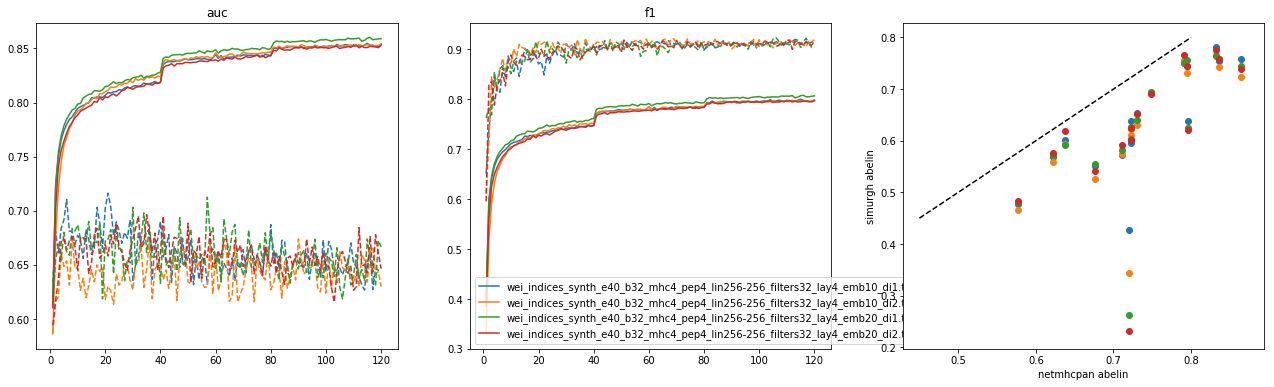

In [77]:
f = ["results3/wei_indices_synth_e40_b32_mhc4_pep4_lin256-256_filters32_lay4_emb10_di1.txt",
     "results3/wei_indices_synth_e40_b32_mhc4_pep4_lin256-256_filters32_lay4_emb10_di2.txt",
     "results3/wei_indices_synth_e40_b32_mhc4_pep4_lin256-256_filters32_lay4_emb20_di1.txt",
     "results3/wei_indices_synth_e40_b32_mhc4_pep4_lin256-256_filters32_lay4_emb20_di2.txt"
    ]

plot_scores(f, True)

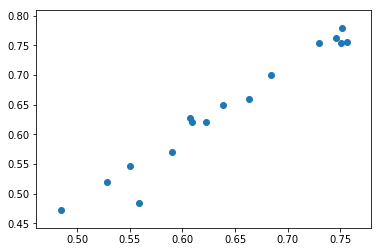

In [104]:
def extract_preds(filename):
    with open(filename) as inf:
        json_val = json.load(inf)
    iters = len(json_val["scores"]["train"]["auc"])
    return [json_val["scores"]["abelin"]["all"][allele] for allele in json_val["scores"]["abelin"]["all"]]

f1 = "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v1.txt"
f2 = "results/wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v2.txt"

f1_pr = extract_preds(f1)
f2_pr = extract_preds(f2)
plt.scatter(f1_pr, f2_pr)

In [24]:
unlog_aff = lambda x: np.exp((1 - x) * np.log(50000))
log_aff = lambda x: 1 - (np.log(np.clip(x, 1, 50000)) / np.log(50000))
BIND_THR = 1 - (np.log(500) / np.log(50000))

def process(df):
    n_of_binders = np.where(df[:, 0] > 0.9)[0].shape[0]
    df[:, 1] = unlog_aff(df[:, 1])
    df = df[df[:,1].argsort()]
    df[:,1] = np.where(df[:,1] >= BIND_THR, 1, 0)
    return df[:n_of_binders, 0].sum() / n_of_binders

preds = []
f = ["results/abelin_wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v1.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_v2.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_convdrop.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc4_pep4_lin128-128_filters32_wide.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_densedrop.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc4_pep4_lin64-64-64_filters32_smallconvdrop.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc5_pep5_lin128-128_filters32_widelay5.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc5_pep5_lin256_filters32_256lay5.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc5_pep5_lin64-64-64_filters32_lay5.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc6_pep6_lin128-128_filters32_widelay6.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256_filters32_256lay6.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256-256_filters32_denselay6.npz"
    ]

f = ["results/abelin_wei_w2v20n_synth_e30_b32_mhc5_pep5_lin128-128_filters32_widelay5.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc5_pep5_lin256_filters32_256lay5.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc5_pep5_lin64-64-64_filters32_lay5.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc6_pep6_lin128-128_filters32_widelay6.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256_filters32_256lay6.npz",
     "results/abelin_wei_w2v20n_synth_e30_b32_mhc6_pep6_lin256-256_filters32_denselay6.npz"
    ]

farr = [np.load(x) for x in f]

for allele in sorted(farr[0].files):
    print(allele)
    vals = []
    for i in range(len(farr)):
        vals.append(process(farr[i][allele]))
        print(round(vals[-1], 3), end=" ")
    print()
    
    tmp = farr[0][allele].copy()
    tmp = np.hstack([tmp, tmp[:,1].reshape((-1, 1))])
    tmp[:,2] = unlog_aff(tmp[:,2])
    for i in range(1, len(farr)):
#         tmp[:,1] = log_aff((unlog_aff(tmp[:,1]) + unlog_aff(farr[1][allele][:,1])) * .5)
        tmp[:,1] += farr[i][allele][:,1]
        tmp[:,2] += unlog_aff(farr[i][allele][:,1])
    tmp[:,1] = tmp[:,1] / len(farr)
    tmp[:,2] = log_aff(tmp[:,2] / len(farr))
    val1 = process(tmp)
    val2 = process(tmp[:,(0,2)])
    print(round(val1, 3), end=" ")
    print(round(val2, 3), end = " max:")
    print(round(max(vals), 3), "(!!!)" if max(vals) < val1 or max(vals) < val2 else "", end = " ")
    best_val = abelin_scores[allele][-1]
    print(round(best_val, 3), "(***)" if best_val < val1 or best_val < val2 else "")

HLAA0101
0.787 0.788 0.762 0.816 0.781 0.805 
0.8 0.794 max:0.816  0.865 
HLAA0201
0.669 0.671 0.664 0.668 0.671 0.667 
0.676 0.677 max:0.671 (!!!) 0.73 
HLAA0203
0.662 0.649 0.634 0.637 0.659 0.681 
0.664 0.667 max:0.681  0.723 
HLAA0204
0.485 0.607 0.488 0.605 0.546 0.567 
0.604 0.602 max:0.607  0.719 
HLAA0207
0.599 0.632 0.57 0.598 0.645 0.621 
0.624 0.622 max:0.645  0.638 
HLAA0301
0.537 0.551 0.528 0.544 0.552 0.556 
0.551 0.55 max:0.556  0.676 
HLAA2402
0.754 0.758 0.742 0.748 0.751 0.756 
0.764 0.763 max:0.758 (!!!) 0.794 
HLAA2902
0.751 0.777 0.769 0.756 0.75 0.772 
0.772 0.769 max:0.777  0.791 
HLAA3101
0.487 0.488 0.451 0.475 0.481 0.48 
0.491 0.49 max:0.488 (!!!) 0.577 
HLAA6802
0.572 0.577 0.567 0.572 0.579 0.578 
0.587 0.587 max:0.579 (!!!) 0.622 
HLAB3501
0.719 0.724 0.707 0.71 0.718 0.724 
0.736 0.735 max:0.724 (!!!) 0.749 
HLAB4402
0.778 0.743 0.764 0.755 0.762 0.776 
0.774 0.769 max:0.778  0.836 
HLAB4403
0.786 0.76 0.782 0.768 0.776 0.793 
0.788 0.783 max:0.793  0.83